In [1]:
cd /ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/Correlations_TF_ATAC/

/ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/Correlations_TF_ATAC


In [2]:
alias bigwig2wig="/staging/leuven/stg_00041/software/bigwig2wig/bigWigToWig"
alias wig2bed="/staging/leuven/stg_00041/software/bedops_v2.4.36/wig2bed"
alias sortbed="/staging/leuven/stg_00041/software/bedops_v2.4.36/sort-bed"
alias bedmap="/staging/leuven/stg_00041/software/bedops_v2.4.36/bedmap"

SyntaxError: invalid syntax (<ipython-input-2-1de778d9a89e>, line 1)

sort the ATAC bed files by position 

In [3]:
sortbed --max-mem 8G cluster1.bed > cluster1_sorted.bed
sortbed --max-mem 8G cluster2.bed > cluster2_sorted.bed
sortbed --max-mem 8G cluster3.bed > cluster3_sorted.bed
sortbed --max-mem 8G cluster4.bed > cluster4_sorted.bed
sortbed --max-mem 8G cluster5.bed > cluster5_sorted.bed
sortbed --max-mem 8G cluster6.bed > cluster6_sorted.bed
sortbed --max-mem 8G cluster7.bed > cluster7_sorted.bed
sortbed --max-mem 8G cluster8.bed > cluster8_sorted.bed
sortbed --max-mem 8G cluster9.bed > cluster9_sorted.bed
sortbed --max-mem 8G cluster10.bed > cluster10_sorted.bed

SyntaxError: invalid syntax (<ipython-input-3-cf7248d55dec>, line 1)

Score the enrichment with bedmap sum and mean

In [4]:
for f in `ls -1 *cluster_sorted.bed | sed 's/cluster_sorted.bed//'`; do bedmap --sum ${f}cluster_sorted.bed Chronis_ESCs_Nanog.bed > ${f}cluster_Nanog_sum.bed; done

### Kernel: R

In [12]:
library(ggplot2)
library(dplyr)
library(readr)

In [13]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/Correlations_TF_ATAC/")

In [14]:
# Importing the raw results and storing in variable
cluster1_Nanog_sum <- read_csv("1cluster_Nanog_sum.bed", col_names = FALSE)
cluster2_Nanog_sum <- read_csv("2cluster_Nanog_sum.bed", col_names = FALSE)
cluster3_Nanog_sum <- read_csv("3cluster_Nanog_sum.bed", col_names = FALSE)
cluster4_Nanog_sum <- read_csv("4cluster_Nanog_sum.bed", col_names = FALSE)
cluster5_Nanog_sum <- read_csv("5cluster_Nanog_sum.bed", col_names = FALSE)
cluster6_Nanog_sum <- read_csv("6cluster_Nanog_sum.bed", col_names = FALSE)
cluster7_Nanog_sum <- read_csv("7cluster_Nanog_sum.bed", col_names = FALSE)
cluster8_Nanog_sum <- read_csv("8cluster_Nanog_sum.bed", col_names = FALSE)
cluster9_Nanog_sum <- read_csv("9cluster_Nanog_sum.bed", col_names = FALSE)
cluster10_Nanog_sum <- read_csv("10cluster_Nanog_sum.bed", col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)


In [15]:
head(cluster1_Nanog_sum)

X1
1
12
120
1
0
3


In [16]:
cluster1_Nanog_sum <- as.data.frame(cluster1_Nanog_sum)
cluster2_Nanog_sum <- as.data.frame(cluster2_Nanog_sum)
cluster3_Nanog_sum <- as.data.frame(cluster3_Nanog_sum)
cluster4_Nanog_sum <- as.data.frame(cluster4_Nanog_sum)
cluster5_Nanog_sum <- as.data.frame(cluster5_Nanog_sum)
cluster6_Nanog_sum <- as.data.frame(cluster6_Nanog_sum)
cluster7_Nanog_sum <- as.data.frame(cluster7_Nanog_sum)
cluster8_Nanog_sum <- as.data.frame(cluster8_Nanog_sum)
cluster9_Nanog_sum <- as.data.frame(cluster9_Nanog_sum)
cluster10_Nanog_sum <- as.data.frame(cluster10_Nanog_sum)


In [17]:
cluster1_Nanog_sum$cluster <- "C1"
cluster2_Nanog_sum$cluster <- "C2"
cluster3_Nanog_sum$cluster <- "C3"
cluster4_Nanog_sum$cluster <- "C4"
cluster5_Nanog_sum$cluster <- "C5"
cluster6_Nanog_sum$cluster <- "C6"
cluster7_Nanog_sum$cluster <- "C7"
cluster8_Nanog_sum$cluster <- "C8"
cluster9_Nanog_sum$cluster <- "C9"
cluster10_Nanog_sum$cluster <- "C10"

In [18]:
ATACclusters_Nanog_sum_merged <- rbind(cluster1_Nanog_sum,
                                        cluster2_Nanog_sum,
                                        cluster3_Nanog_sum,
                                        cluster4_Nanog_sum,
                                        cluster5_Nanog_sum,
                                        cluster6_Nanog_sum,
                                        cluster7_Nanog_sum,
                                        cluster8_Nanog_sum,
                                        cluster9_Nanog_sum,
                                        cluster10_Nanog_sum)

In [19]:
head(ATACclusters_Nanog_sum_merged)

X1,cluster
1,C1
12,C1
120,C1
1,C1
0,C1
3,C1


In [20]:
ATACclusters_Nanog_sum_merged$cluster <- factor(ATACclusters_Nanog_sum_merged$cluster, levels = c("C6", "C1", "C7","C8","C5","C3","C9","C2","C10","C4"))

In [27]:
Nanog <- ggplot(ATACclusters_Nanog_sum_merged, aes(x=as.factor(cluster),y=X1, color = cluster))+
  geom_violin(aes(fill = cluster)) +
scale_y_log10()+
scale_fill_brewer(palette="Paired")+
scale_color_brewer(palette = "Paired")+
#coord_cartesian(ylim=c(0,30))+
geom_point(position = position_jitter(width = .3), alpha = .3, size = 1, color = "black", shape = 1)+
geom_boxplot(width=.2, color = "black", fill = "white")+

theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=14, color = "black"))+
xlab("") +
ylab("mean score")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("NANOG")+
theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 31 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 31 rows containing non-finite values (stat_boxplot)."

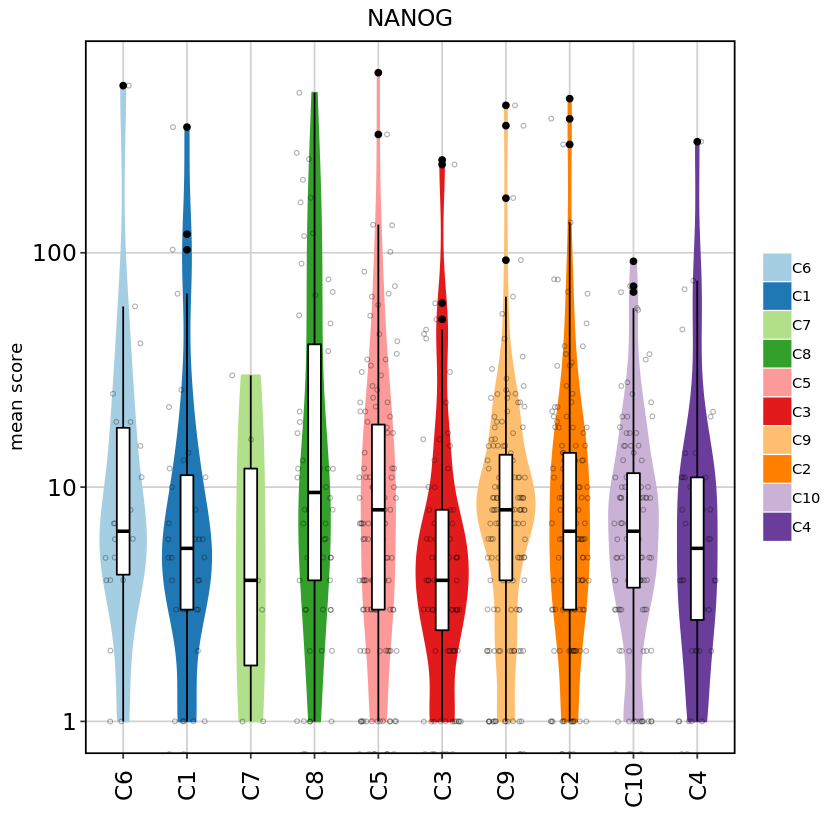

In [28]:
Nanog

In [30]:
ggsave("ATACclusters_Nanog_sum_log10.pdf")

Saving 6.67 x 6.67 in image
Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 31 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 31 rows containing non-finite values (stat_boxplot)."

In [21]:
ggsave("ATACclusters_Nanog_sum_zoom.pdf")

Saving 6.67 x 6.67 in image


In [22]:
pairwise.wilcox.test(ATACclusters_Nanog_sum_merged$X1, ATACclusters_Nanog_sum_merged$cluster, p.adjust.method = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"


	Pairwise comparisons using Wilcoxon rank sum test 

data:  ATACclusters_Nanog_sum_merged$X1 and ATACclusters_Nanog_sum_merged$cluster 

    C6      C1      C7      C8      C5      C3      C9      C2      C10    
C1  0.19888 -       -       -       -       -       -       -       -      
C7  0.35735 0.86270 -       -       -       -       -       -       -      
C8  0.65141 0.07498 0.27819 -       -       -       -       -       -      
C5  0.58762 0.37678 0.54228 0.15649 -       -       -       -       -      
C3  0.01647 0.24533 0.79827 0.00099 0.01140 -       -       -       -      
C9  0.89740 0.12250 0.50293 0.22832 0.82413 0.00042 -       -       -      
C2  0.46097 0.36483 0.55536 0.12336 0.84894 0.00714 0.53379 -       -      
C10 0.34213 0.53443 0.67035 0.05512 0.47860 0.01888 0.22011 0.60760 -      
C4  0.18024 0.89620 0.90864 0.04801 0.27032 0.30527 0.12325 0.27318 0.47865

P value adjustment method: none 